## Data Preprocessing
    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o	Perform Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test

## Perform Data preprocessing on Titanic dataset

### Import the Libraries.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset.

In [68]:
df = pd.read_csv("Titanic.csv")

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [71]:
df.shape

(891, 12)

In [72]:
df.ndim

2

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
corr=df.corr()
corr

C:\Users\vishnu vardhan\AppData\Local\Temp\ipykernel_193160\3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [76]:
ports=pd.get_dummies(df.Embarked,prefix='Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [77]:
df=df.join(ports)
df.drop(['Embarked'],axis=1,inplace=True)

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


### Checking for Null Values

In [80]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked_C     False
Embarked_Q     False
Embarked_S     False
dtype: bool

In [81]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [82]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [83]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [88]:
df.drop(['Cabin'],axis=1,inplace=True)

In [86]:
df.drop(['Embarked_C'],axis=1,inplace=True)
df.drop(['Embarked_Q'],axis=1,inplace=True)
df.drop(['Embarked_S'],axis=1,inplace=True)

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [21]:
df.shape

(891, 10)

### Data Visualization

<Axes: >

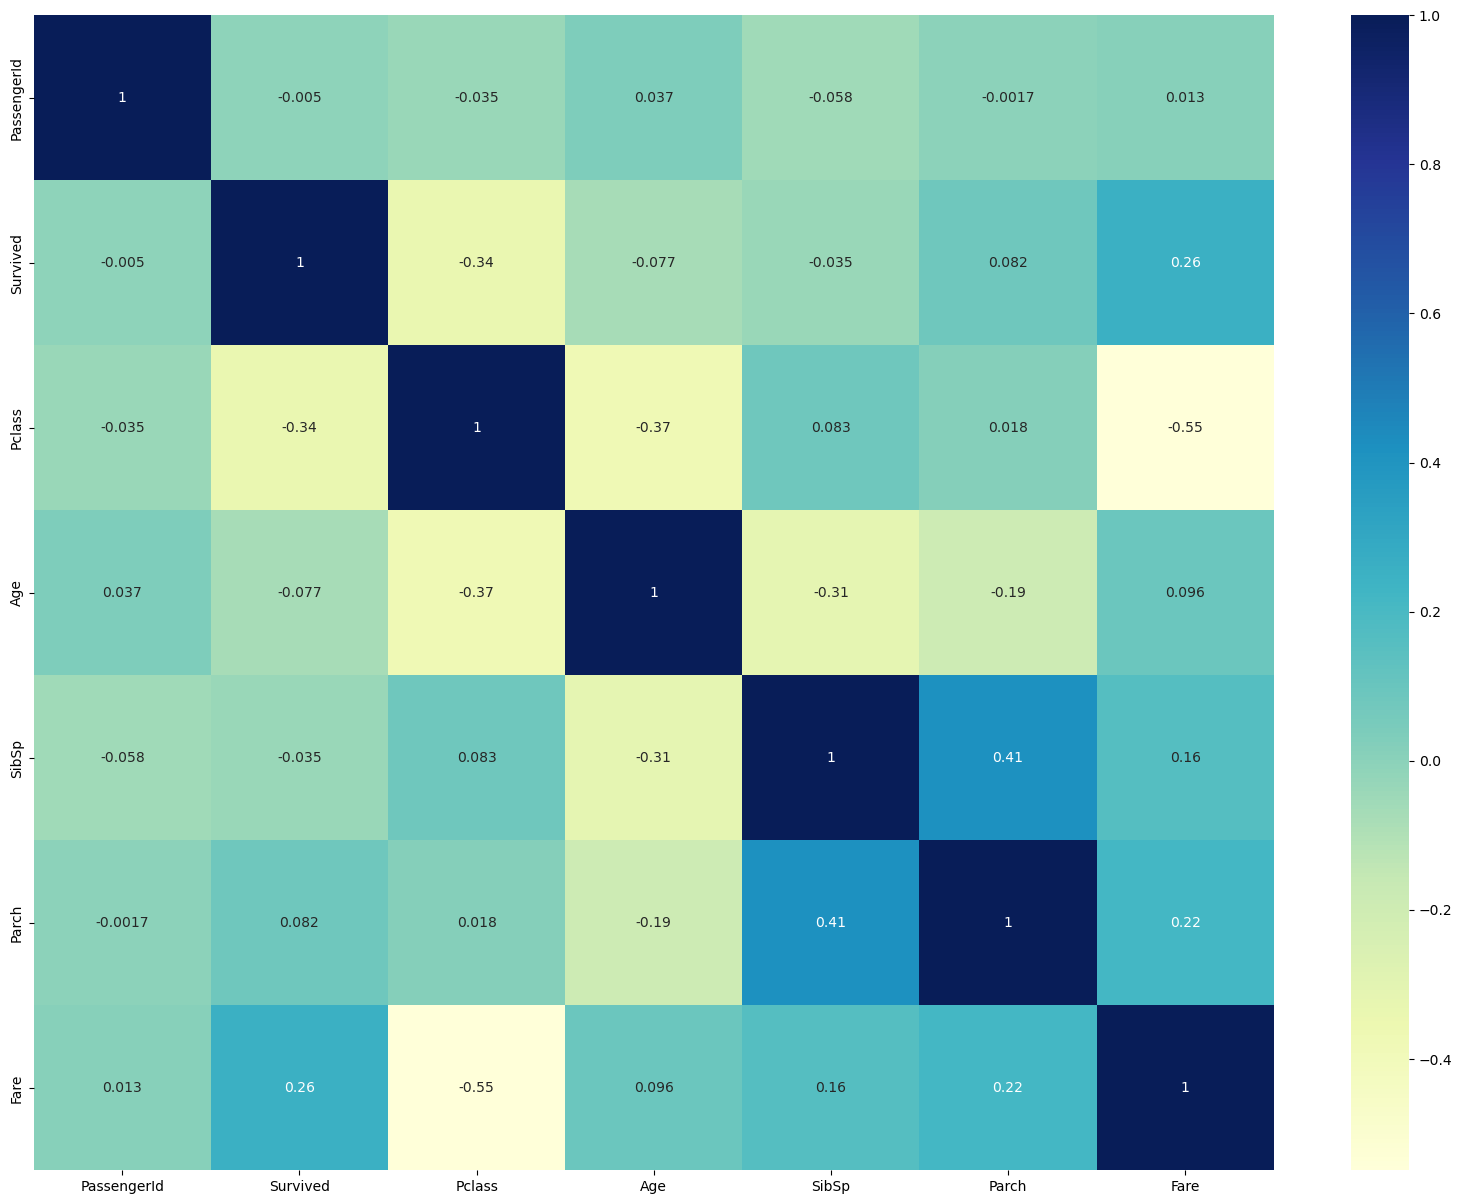

In [89]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='YlGnBu')

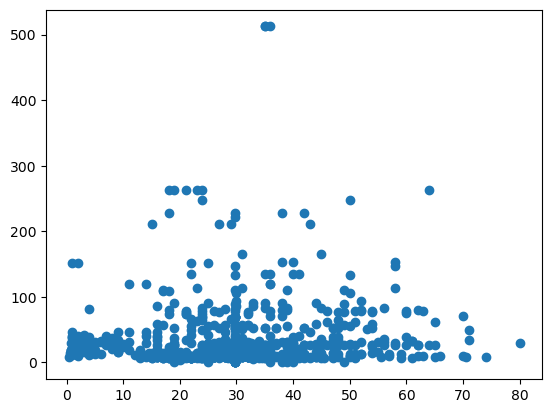

In [90]:
plt.scatter(df["Age"],df["Fare"])

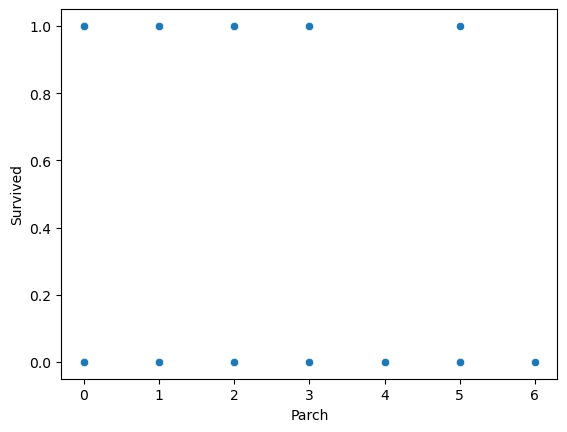

In [91]:
sns.scatterplot(x="Parch",y="Survived",data=df)
plt.show()

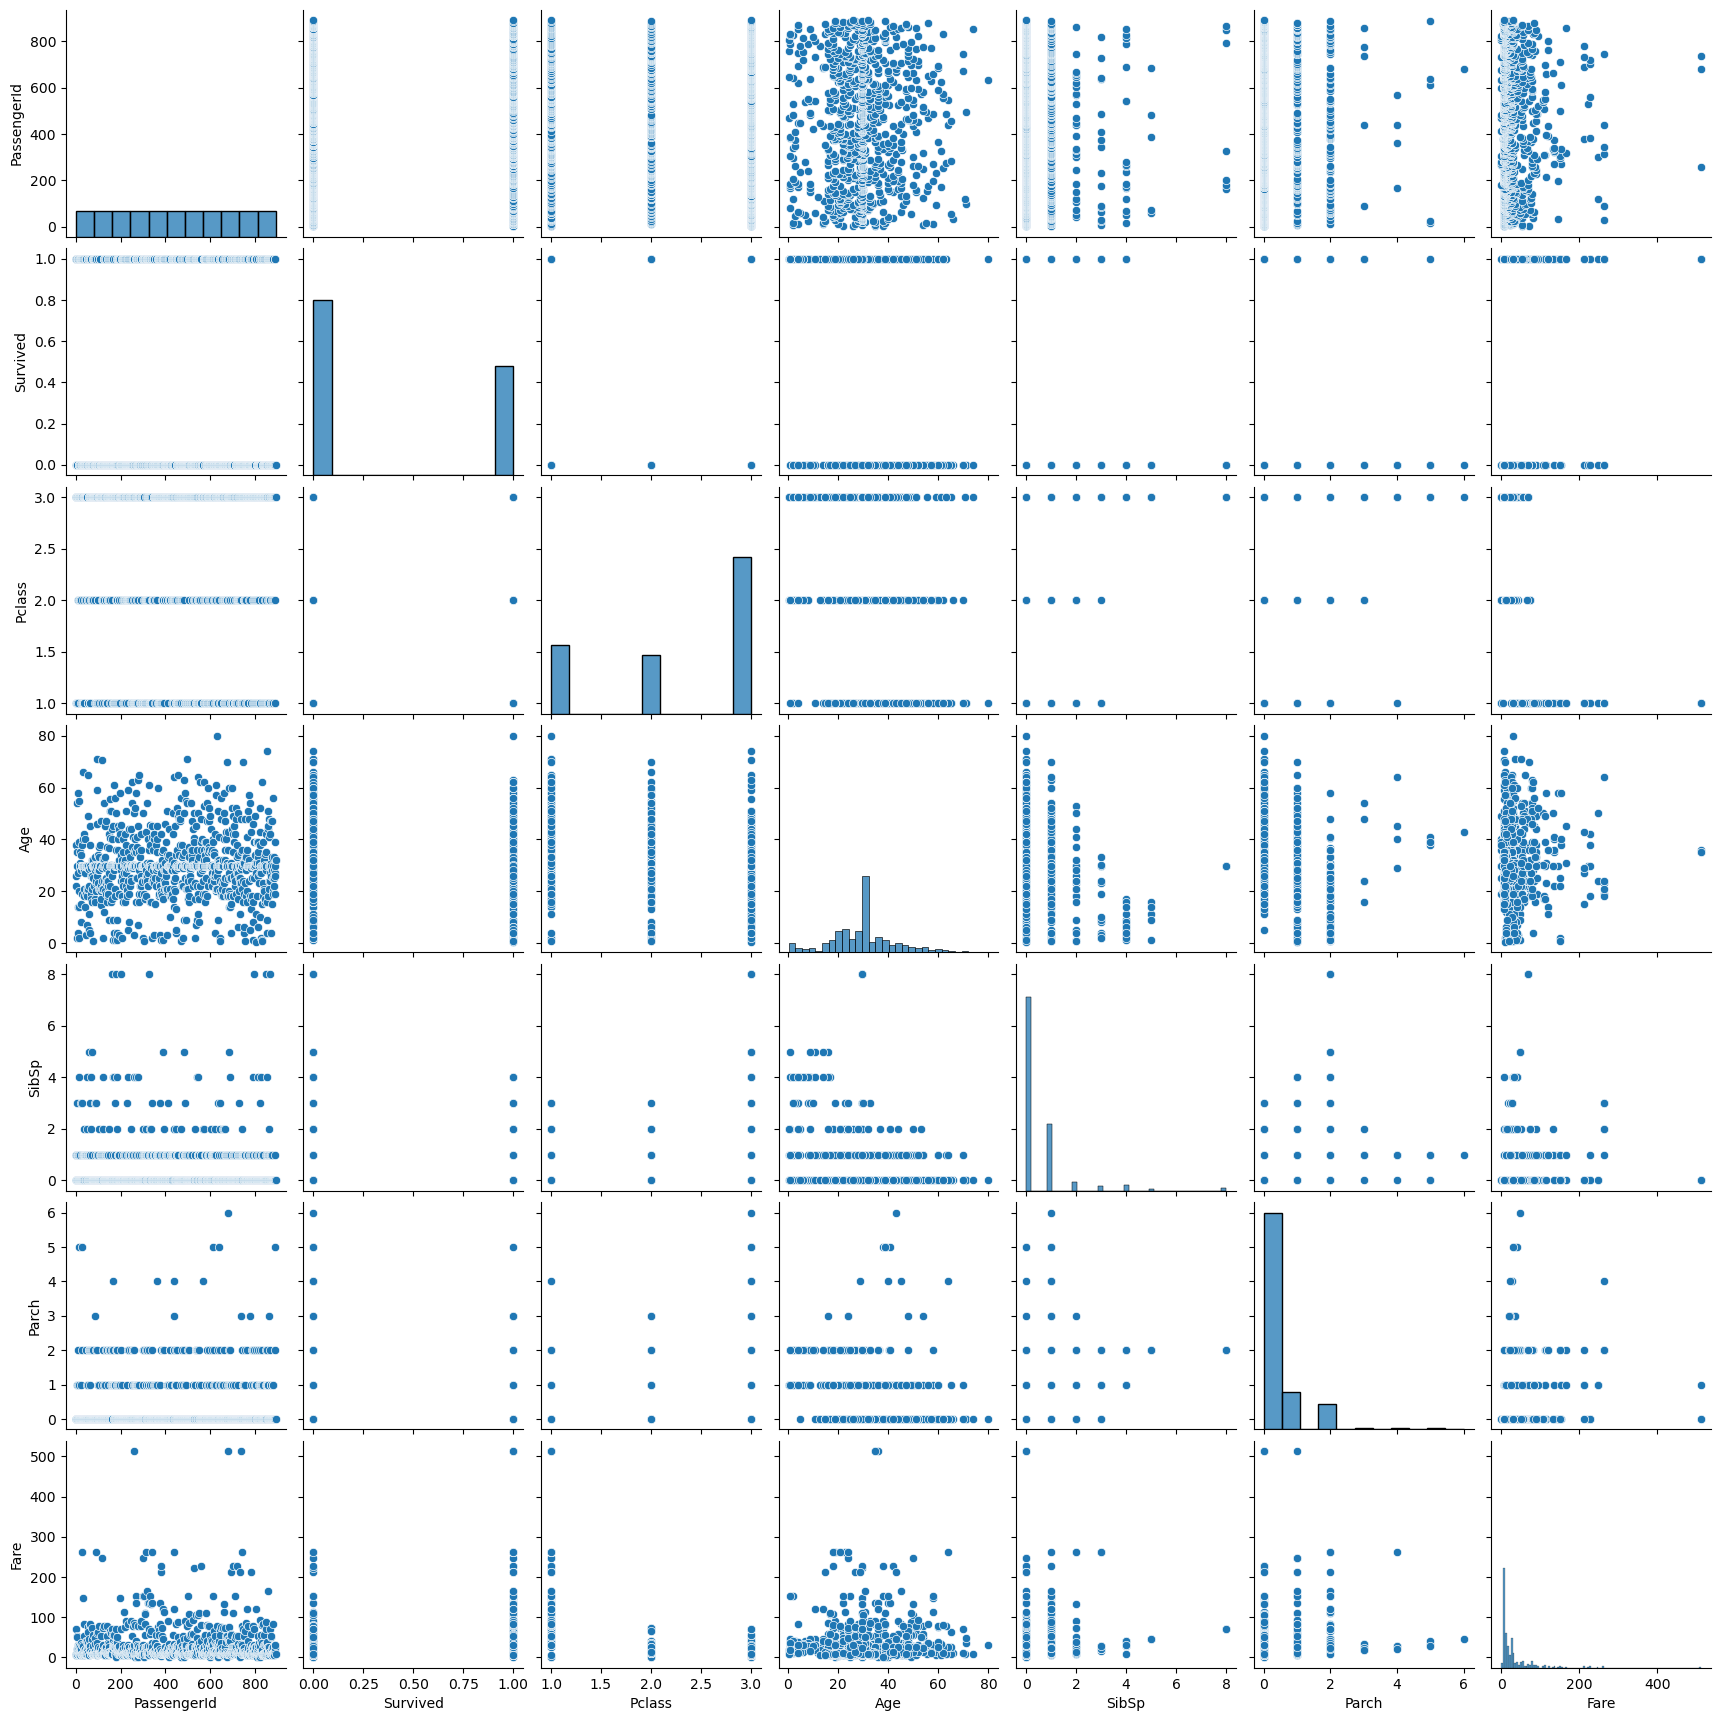

In [92]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Fare'>

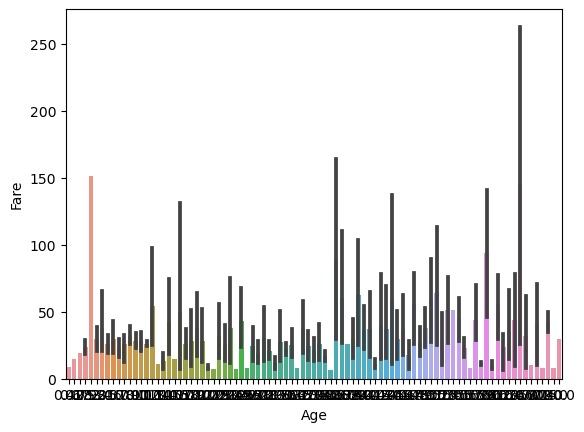

In [93]:
sns.barplot(x=df["Age"],y=df["Fare"])

<Axes: >

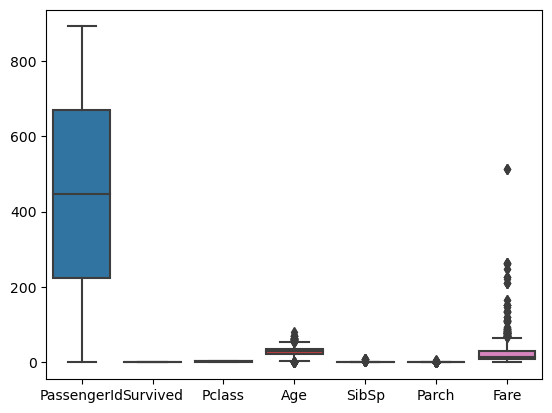

In [32]:
sns.boxplot(df)

### Outlier Detection

<Axes: >

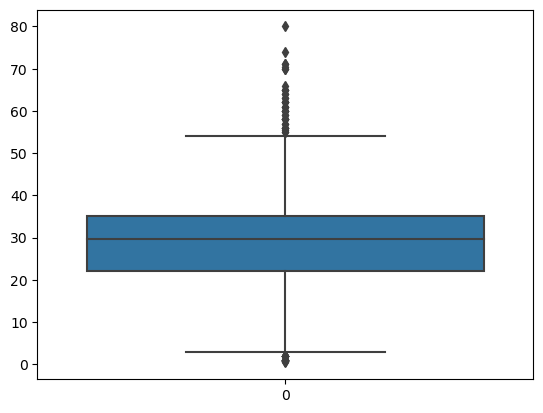

In [94]:
sns.boxplot(df.Age)

In [248]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)
q2=df.Age.quantile(0.50)

In [249]:
q1

30.0

In [250]:
q2

30.0

In [251]:
q3

30.0

In [252]:
IQR=q3-q1
IQR

0.0

In [253]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [254]:
upper_limit

30.0

In [255]:
lower_limit

30.0

In [256]:
df.median()

C:\Users\vishnu vardhan\AppData\Local\Temp\ipykernel_193160\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


PassengerId    446.00
Survived         0.00
Pclass           3.00
Age             30.00
SibSp            0.00
Parch            0.00
Fare            14.45
dtype: float64

In [257]:
df['Age']=np.where(df['Age']>upper_limit,30,df['Age'])
df['Age']=np.where(df['Age']<lower_limit,30,df['Age'])
#df=df[(df.Age<lower_limit)&(df.Age>upper_limit)]

<Axes: >

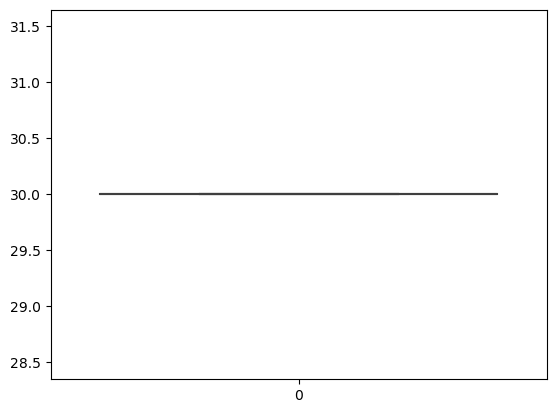

In [258]:
sns.boxplot(df.Age)

<Axes: >

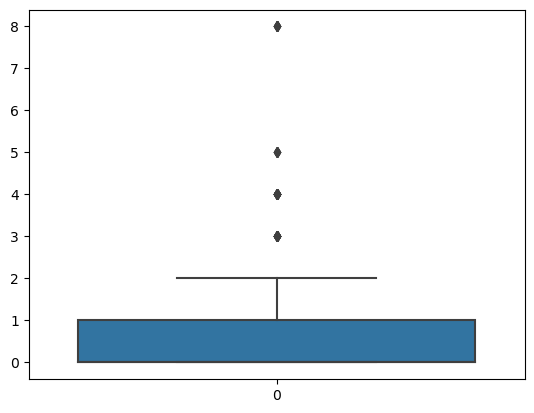

In [106]:
sns.boxplot(df.SibSp)

In [107]:
q1=df.SibSp.quantile(0.25)
q3=df.SibSp.quantile(0.75)
q2=df.SibSp.quantile(0.50)

In [108]:
q1

0.0

In [109]:
q2

0.0

In [110]:
q3

1.0

In [111]:
IQR=q3-q1
IQR

1.0

In [112]:
upper_limit=q3+1.5*IQR
upper_limit

2.5

In [113]:
lower_limit=q1-1.5*IQR
lower_limit

-1.5

In [114]:
df.median()

C:\Users\vishnu vardhan\AppData\Local\Temp\ipykernel_193160\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


PassengerId    446.000000
Survived         0.000000
Pclass           3.000000
Age             29.699118
SibSp            0.000000
Parch            0.000000
Fare            14.454200
dtype: float64

In [115]:
df['SibSp']=np.where(df['SibSp']>upper_limit,30,df['SibSp'])

<Axes: >

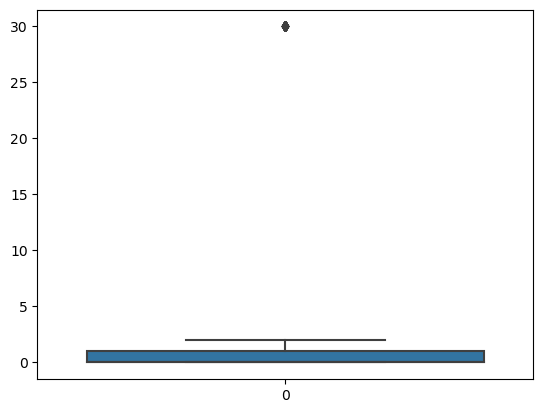

In [116]:
sns.boxplot(df.SibSp)

<Axes: >

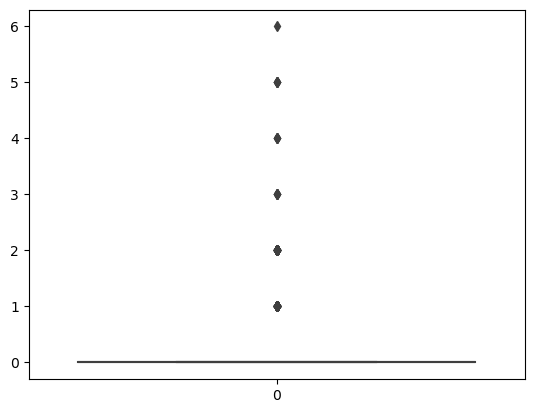

In [117]:
sns.boxplot(df.Parch)

In [118]:
q1=df.Parch.quantile(0.25)
q3=df.Parch.quantile(0.75)
q2=df.Parch.quantile(0.50)

In [119]:
q1

0.0

In [120]:
q2

0.0

In [121]:
q3

0.0

In [122]:
IQR=q3-q1
IQR

0.0

In [123]:
upper_limit=q3+1.5*IQR
upper_limit

0.0

In [124]:
lower_limit=q1-1.5*IQR
lower_limit

0.0

In [125]:
df['Parch']=np.where(df['Parch']>upper_limit,0,df['Parch'])

<Axes: >

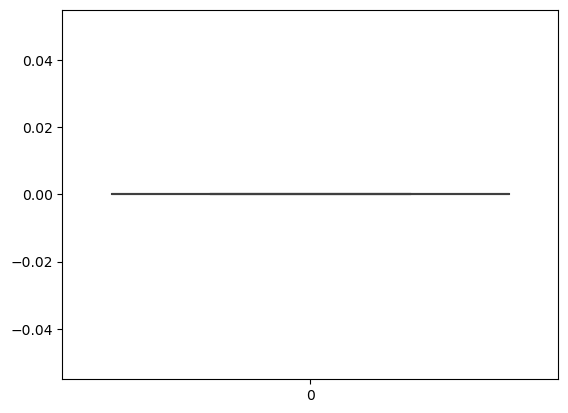

In [164]:
sns.boxplot(df.Parch)

<Axes: >

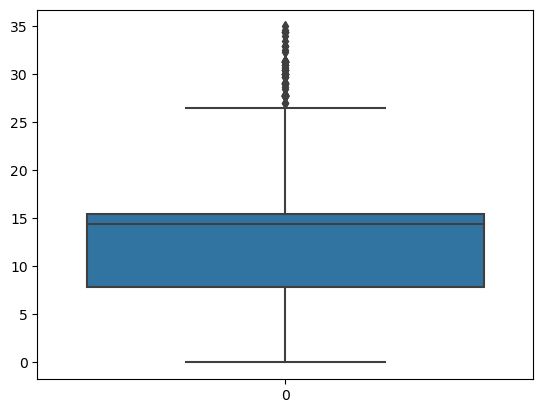

In [165]:
sns.boxplot(df.Fare)

In [259]:
q1=df.Fare.quantile(0.25)
q3=df.Fare.quantile(0.75)
q2=df.Fare.quantile(0.50)

In [260]:
q1

7.9104

In [261]:
q2

14.45

In [262]:
q3

14.45

In [263]:
IQR=q3-q1
IQR

6.539599999999999

In [264]:
upper_limit=q3+1.5*IQR
upper_limit

24.2594

In [265]:
lower_limit=q1-1.5*IQR
lower_limit

-1.8989999999999982

In [266]:
df.median()

C:\Users\vishnu vardhan\AppData\Local\Temp\ipykernel_193160\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


PassengerId    446.00
Survived         0.00
Pclass           3.00
Age             30.00
SibSp            0.00
Parch            0.00
Fare            14.45
dtype: float64

In [267]:
df['Fare']=np.where(df['Fare']>upper_limit,14.45,df['Fare'])

<Axes: >

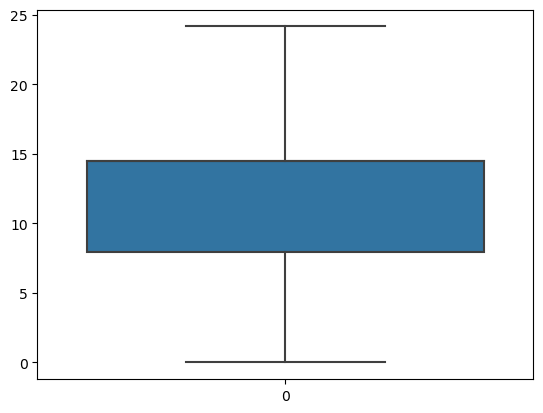

In [268]:
sns.boxplot(df.Fare)

### Splitting Dependent and Independent variables

In [177]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,14.4500
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,14.4500
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,14.4500
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,30,0,349909,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,0,347742,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,14.4500


In [178]:
x=df.iloc[:,2:]
y=df.iloc[:,1:2]

In [179]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,14.450
2,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,14.450
4,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050
...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000
887,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,14.450
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,0,W./C. 6607,23.450
889,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,14.450


In [180]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [181]:
x.shape

(891, 8)

### Perform Encoding

In [182]:
from sklearn.preprocessing import LabelEncoder

In [185]:
le=LabelEncoder()

In [186]:
x["Name"]=le.fit_transform(x["Name"])

In [187]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,108,male,22.0,1,0,A/5 21171,7.250
1,1,190,female,38.0,1,0,PC 17599,14.450
2,3,353,female,26.0,0,0,STON/O2. 3101282,7.925
3,1,272,female,35.0,1,0,113803,14.450
4,3,15,male,35.0,0,0,373450,8.050


In [196]:
x["Name"].value_counts()

108    1
98     1
267    1
284    1
566    1
      ..
431    1
518    1
411    1
428    1
220    1
Name: Name, Length: 891, dtype: int64

In [188]:
x["Sex"]=le.fit_transform(x["Sex"])

In [189]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,108,1,22.0,1,0,A/5 21171,7.250
1,1,190,0,38.0,1,0,PC 17599,14.450
2,3,353,0,26.0,0,0,STON/O2. 3101282,7.925
3,1,272,0,35.0,1,0,113803,14.450
4,3,15,1,35.0,0,0,373450,8.050


In [194]:
x["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [190]:
x["Ticket"]=le.fit_transform(x["Ticket"])

In [191]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,108,1,22.0,1,0,523,7.250
1,1,190,0,38.0,1,0,596,14.450
2,3,353,0,26.0,0,0,669,7.925
3,1,272,0,35.0,1,0,49,14.450
4,3,15,1,35.0,0,0,472,8.050


In [195]:
x["Ticket"].value_counts()

333    7
568    7
80     7
249    6
566    6
      ..
513    1
98     1
212    1
606    1
466    1
Name: Ticket, Length: 681, dtype: int64

### Feature Scaling.

In [197]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [198]:
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.82737724, -1.31021659,  0.73769513, ...,  0.        ,
         0.91896631, -1.0191909 ],
       [-1.56610693, -0.99141018, -1.35557354, ...,  0.        ,
         1.28262456,  0.27123506],
       [ 0.82737724, -0.35768524, -1.35557354, ...,  0.        ,
         1.64628282, -0.89821347],
       ...,
       [ 0.82737724, -0.12441226, -1.35557354, ...,  0.        ,
         1.67617254,  1.88426751],
       [-1.56610693, -1.41518943,  0.73769513, ...,  0.        ,
        -1.64656796,  0.27123506],
       [ 0.82737724, -0.87477369,  0.73769513, ...,  0.        ,
         0.63501397, -0.92957799]])

### Splitting Data into Train and Test

In [201]:
from sklearn.model_selection import train_test_split

In [203]:
tts=train_test_split

In [204]:
x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.2,random_state=0)

In [206]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 8) (179, 8) (712, 1) (179, 1)


In [270]:
x_train

array([[ 0.82737724, -1.34520754, -1.35557354, ...,  0.        ,
        -0.67515207,  0.41386297],
       [-0.36936484,  0.00777577,  0.73769513, ...,  0.        ,
         1.03852519, -0.43670696],
       [-0.36936484,  0.2293851 ,  0.73769513, ...,  0.        ,
         1.3922202 ,  0.27123506],
       ...,
       [ 0.82737724,  0.61039764,  0.73769513, ...,  0.        ,
        -0.26167762, -0.93257106],
       [ 0.82737724,  1.71066854, -1.35557354, ...,  0.        ,
        -0.19193494,  0.79995125],
       [-0.36936484, -1.29466506,  0.73769513, ...,  0.        ,
        -0.49083214,  0.27123506]])

In [271]:
x_test

array([[ 0.82737724,  1.69122913,  0.73769513, ...,  0.        ,
        -0.80965581,  0.27272263],
       [ 0.82737724,  1.63291088,  0.73769513, ...,  0.        ,
         1.40218344, -0.96542316],
       [ 0.82737724,  0.9175404 ,  0.73769513, ...,  0.        ,
         0.70475665,  0.27123506],
       ...,
       [-1.56610693,  0.53263998, -1.35557354, ...,  0.        ,
         0.38593297,  0.27123506],
       [ 0.82737724, -1.53960169,  0.73769513, ...,  0.        ,
         0.0172931 , -0.91090266],
       [ 0.82737724, -1.43851673,  0.73769513, ...,  0.        ,
        -0.32643868, -0.87581024]])

In [207]:
y_train

,Survived
140,0
439,0
817,0
378,0
491,0
...,...
835,1
192,1
629,0
559,1


In [269]:
y_test

,Survived
495,0
648,0
278,0
31,1
255,1
...,...
780,1
837,0
215,1
833,0
